<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Medical-Insurance-Cost-Forecast-DL_Reg/blob/main/Medical_Insurance_Cost_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [16]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Load the data

In [4]:
# Read data directly from github [Important]

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Prepare the data

In [10]:
# One hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [14]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [15]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Divide into train and test dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train[:5]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [19]:
y_train[:5]

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [20]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

## Build a Model

In [47]:
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13298.3328 - mae: 13298.3328
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12945.3002 - mae: 12945.3002
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.8516 - mae: 12705.8516
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13393.0255 - mae: 13393.0255
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13305.0852 - mae: 13305.0852
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13161.1847 - mae: 13161.1847
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13182.2408 - mae: 13182.2408
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13511.3947 - mae: 13511.3947
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.3684 - mae: 13284.3684
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13429.63

## Evaluate on test

In [22]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

In [23]:
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)

This shows that our model is performing substantially bad because error is pretty high when compared to mean or median.

## Improving our Model

1. Add extra layer (with more hidden units)
2. Increase number of units in layers.
3. Train for more epochs.
4. Try changing optimizer(SGD) [Gives `nan` loss]

In [31]:
# More Epochs [500]

# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13298.3328 - mae: 13298.3328
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12945.3002 - mae: 12945.3002
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12705.8516 - mae: 12705.8516
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13393.0255 - mae: 13393.0255
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13305.0852 - mae: 13305.0852
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13161.1847 - mae: 13161.1847
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 13182.2408 - mae: 13182.2408
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 13511.3947 - mae: 13511.3947
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 13284.3684 - mae: 13284.3684
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 13429.63

In [34]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6233.7979 - mae: 6233.7979


[6233.7978515625, 6233.7978515625]

In [37]:
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.7184 - mae:

In [38]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [39]:
# Changing optimizer to SGD [Gives nan Loss][Important]
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan           
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 

In [40]:
# Adding another layer and Increasing neurons in 2nd Layer

# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(50),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_5.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13234.7150 - mae: 13234.7150
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12534.5281 - mae: 12534.5281
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11304.2129 - mae: 11304.2129
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 9949.9326 - mae: 9949.9326
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7912.6520 - mae: 7912.6520
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7520.5711 - mae: 7520.5711
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7383.9624 - mae: 7383.9624
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7446.1834 - mae: 7446.1834
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7419.5155 - mae: 7419.5155
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7518.1795 - mae: 751

In [41]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3600.2983 - mae: 3600.2983


[3600.29833984375, 3600.29833984375]

In [45]:
# Adding another layer, increasing neurons in 2nd layer and increasing epochs to 300

# Build a model
insurance_model_6 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(50),
                                         tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_6.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fitting the model
history_6 = insurance_model_6.fit(X_train, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 0s 1ms/step - loss: 13238.9343 - mae: 13238.9343
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 12516.4639 - mae: 12516.4639
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 11257.8792 - mae: 11257.8792
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 9878.9873 - mae: 9878.9873
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7864.7628 - mae: 7864.7628
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 7504.8764 - mae: 7504.8764
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 7367.2679 - mae: 7367.2679
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 7431.3268 - mae: 7431.3268
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 7403.1011 - mae: 7403.1011
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 7499.1578 - mae: 749

In [46]:
insurance_model_6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.5347 - mae: 3161.5347


[3161.53466796875, 3161.53466796875]

In [48]:
# First model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

In [54]:
history_6.history['loss']

[13225.2939453125,
 12735.494140625,
 11458.775390625,
 9199.6865234375,
 7575.255859375,
 7387.75537109375,
 7353.61669921875,
 7320.2548828125,
 7286.47021484375,
 7253.41943359375,
 7221.6982421875,
 7180.79931640625,
 7141.20361328125,
 7100.1728515625,
 7061.1298828125,
 7017.1240234375,
 6976.822265625,
 6925.1708984375,
 6878.53857421875,
 6827.49755859375,
 6776.72021484375,
 6728.28515625,
 6671.86376953125,
 6623.1640625,
 6578.451171875,
 6542.64794921875,
 6516.61767578125,
 6492.7705078125,
 6469.47412109375,
 6457.50537109375,
 6433.6845703125,
 6415.8505859375,
 6397.125,
 6382.384765625,
 6355.7529296875,
 6337.1162109375,
 6309.16845703125,
 6293.89013671875,
 6269.16845703125,
 6243.43017578125,
 6221.52294921875,
 6192.37890625,
 6171.3720703125,
 6134.4599609375,
 6113.5732421875,
 6088.85302734375,
 6049.6572265625,
 6007.568359375,
 5972.0478515625,
 5935.0595703125,
 5893.078125,
 5846.60107421875,
 5801.6865234375,
 5750.68994140625,
 5696.76123046875,
 5641.595

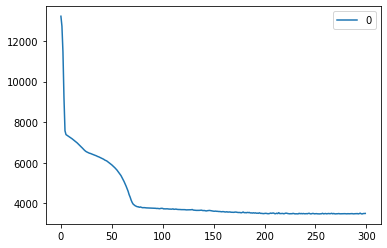

In [57]:
pd.DataFrame(history_6.history['loss']).plot()

Text(0, 0.5, 'loss and MAE')

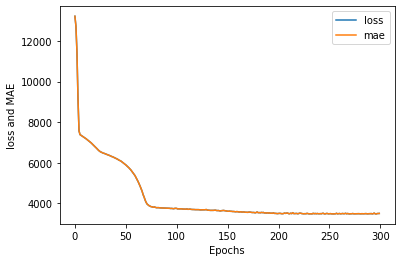

In [58]:
pd.DataFrame(history_6.history).plot()
plt.xlabel('Epochs')
plt.ylabel('loss and MAE')

Looks like our loss is still decreasing. So, we can train for some more epochs.

## Preprocessing Data (Normalization and standardization) [Extended]